<a href="https://colab.research.google.com/github/LyanhVini/Analysis-of-Anthropic-Indicators-in-Amazonian-Communities-/blob/main/Decision%20Trees/updates/eixo1_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Tratamento dos dados

A cada valor X nos dados, será substituído pela moda da feature

In [ ]:
eixo_1 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadev8.xlsx").filter(["P01", "P02", "P03", "P04", "P05", "P06", "P07", "P08", "P09","P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25", "perfil"])
#eixo_1 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadev8.xlsx").filter(["P01", "P04", "P09", "P10", "P11", "P13", "P15", "P17", "P23", "P25", "perfil"])
eixo_1 = eixo_1.loc[0:169].reset_index(drop=True)
eixo_1

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,perfil
0,5,5,5,3,5,3,3,3,2,4,...,2,2,2,2,5,5,3,3,3,quilombola
1,5,5,3,3,3,4,5,5,3,3,...,2,2,4,3,3,3,3,3,3,quilombola
2,5,5,5,4,5,5,5,5,2,3,...,3,5,5,4,3,5,5,3,3,quilombola
3,4,5,4,3,4,5,5,4,3,4,...,1,2,2,3,5,4,3,3,4,quilombola
4,5,5,3,3,5,5,5,5,3,4,...,1,1,3,3,5,5,3,3,3,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,5,5,5,3,5,5,5,5,5,5,...,2,1,1,1,5,5,3,3,3,pescador
166,5,5,5,5,5,5,5,5,2,3,...,3,5,5,5,5,5,5,3,5,pescador
167,5,5,5,4,5,5,5,5,2,5,...,1,1,5,3,5,5,3,3,5,pescador
168,5,5,5,5,5,5,4,5,3,5,...,4,1,5,4,4,5,5,3,5,pescador


In [ ]:
for col in eixo_1.columns:
  moda = eixo_1[col][eixo_1[col] != 'X'].mode()[0]
  eixo_1[col] = eixo_1[col].replace('X', moda)
eixo_1

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,perfil
0,5,5,5,3,5,3,3,3,2,4,...,2,2,2,2,5,5,3,3,3,quilombola
1,5,5,3,3,3,4,5,5,3,3,...,2,2,4,3,3,3,3,3,3,quilombola
2,5,5,5,4,5,5,5,5,2,3,...,3,5,5,4,3,5,5,3,3,quilombola
3,4,5,4,3,4,5,5,4,3,4,...,1,2,2,3,5,4,3,3,4,quilombola
4,5,5,3,3,5,5,5,5,3,4,...,1,1,3,3,5,5,3,3,3,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,5,5,5,3,5,5,5,5,5,5,...,2,1,1,1,5,5,3,3,3,pescador
166,5,5,5,5,5,5,5,5,2,3,...,3,5,5,5,5,5,5,3,5,pescador
167,5,5,5,4,5,5,5,5,2,5,...,1,1,5,3,5,5,3,3,5,pescador
168,5,5,5,5,5,5,4,5,3,5,...,4,1,5,4,4,5,5,3,5,pescador


### Extração de Características

In [ ]:
"""
eixo_1.replace('X', np.nan, inplace=True)
#eixo_1.replace('x', pd.NA, inplace=True)
eixo_1.dropna(inplace=True)
eixo_1 = eixo_1.reset_index()
eixo_1 = eixo_1.drop('index', axis=1)
eixo_1
"""

In [ ]:
eixo_1['perfil'].unique()

array(['quilombola', 'indígena', 'pescador', 'urbano',
       'extrativista/agricultor'], dtype=object)

Padronizando tudo para float

In [ ]:
eixo_1[["P01", "P02", "P03", "P04", "P05", "P06", "P07", "P08", "P09","P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25"]] = eixo_1[["P01", "P02", "P03", "P04", "P05", "P06", "P07", "P08", "P09","P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25"]].astype(float)

In [ ]:
eixo_1

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,perfil
0,5.0,5.0,5.0,3.0,5.0,3.0,3.0,3.0,2.0,4.0,...,2.0,2.0,2.0,2.0,5.0,5.0,3.0,3.0,3.0,quilombola
1,5.0,5.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,...,2.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,quilombola
2,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,2.0,3.0,...,3.0,5.0,5.0,4.0,3.0,5.0,5.0,3.0,3.0,quilombola
3,4.0,5.0,4.0,3.0,4.0,5.0,5.0,4.0,3.0,4.0,...,1.0,2.0,2.0,3.0,5.0,4.0,3.0,3.0,4.0,quilombola
4,5.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,3.0,4.0,...,1.0,1.0,3.0,3.0,5.0,5.0,3.0,3.0,3.0,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,...,2.0,1.0,1.0,1.0,5.0,5.0,3.0,3.0,3.0,pescador
166,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,3.0,...,3.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,pescador
167,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,2.0,5.0,...,1.0,1.0,5.0,3.0,5.0,5.0,3.0,3.0,5.0,pescador
168,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,...,4.0,1.0,5.0,4.0,4.0,5.0,5.0,3.0,5.0,pescador


In [ ]:
X = eixo_1.drop("perfil", axis=1)
y = eixo_1["perfil"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
forest = RandomForestClassifier(n_estimators=1000, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# Avaliar o modelo
y_pred = forest.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.7352941176470589


In [ ]:
# Obter importâncias das características
importances = forest.feature_importances_

# Mostrar as 10 características mais importantes
indices = np.argsort(importances)[-12:]
print("Características mais importantes:", X.columns[indices])

Características mais importantes: Index(['P17', 'P11', 'P03', 'P10', 'P19', 'P14', 'P16', 'P24', 'P09', 'P13',
       'P15', 'P23'],
      dtype='object')


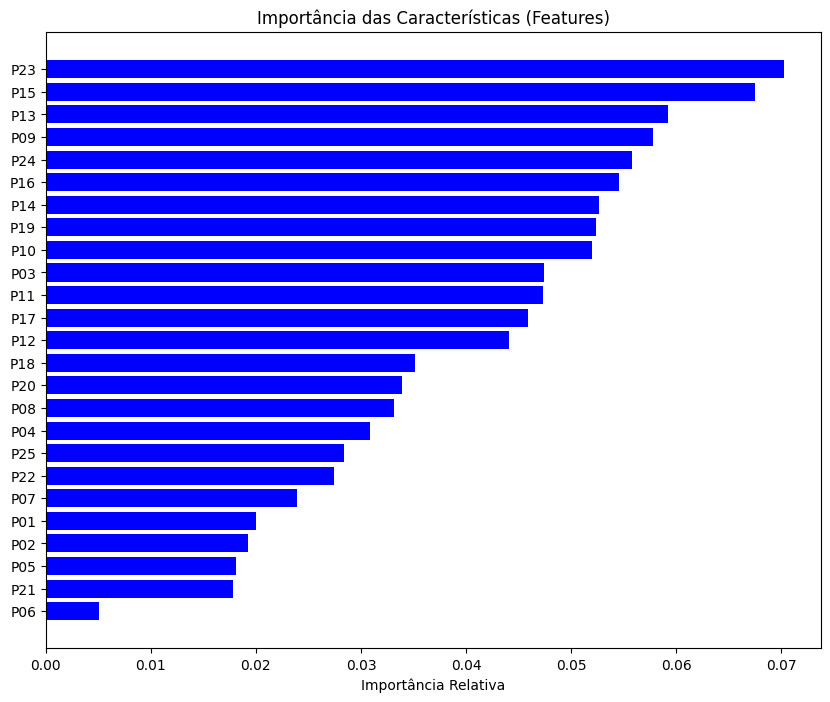

In [ ]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
labels = X.columns[indices]

# Criar o gráfico
plt.figure(figsize=(10, 8))
plt.title('Importância das Características (Features)')
plt.barh(range(X.shape[1]), importances[indices], color='b', align='center')
plt.yticks(range(X.shape[1]), labels)
plt.xlabel('Importância Relativa')
plt.gca().invert_yaxis()
plt.show()

### Montando a árvores com as features filtradas

As 12, 11 ou 9 primeiras tiverem acurácia boa, mas com 11 features foi superior as demais

In [ ]:
eixo_1_ = eixo_1.drop(columns=["P06", "P05", "P02", "P07", "P01", "P21", "P22", "P04", "P08", "P25", "P20", "P18", "P12", "P17"])
eixo_1_

,P03,P09,P10,P11,P13,P14,P15,P16,P19,P23,P24,perfil
0,5.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0,quilombola
1,3.0,3.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,3.0,quilombola
2,5.0,2.0,3.0,3.0,3.0,1.0,3.0,4.0,5.0,5.0,3.0,quilombola
3,4.0,3.0,4.0,3.0,4.0,3.0,5.0,2.0,2.0,3.0,3.0,quilombola
4,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...
165,5.0,5.0,5.0,3.0,4.0,5.0,1.0,3.0,1.0,3.0,3.0,pescador
166,5.0,2.0,3.0,4.0,5.0,5.0,1.0,5.0,5.0,5.0,3.0,pescador
167,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,pescador
168,5.0,3.0,5.0,3.0,3.0,3.0,4.0,3.0,5.0,5.0,3.0,pescador


In [ ]:
X_ = eixo_1_.drop("perfil", axis=1)
y_ = eixo_1_["perfil"]
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 8, 10, 15, 20],
    'min_samples_split': [2, 3, 5, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'max_features': ['sqrt', 'log2', None]
}
clf = DecisionTreeClassifier(random_state=42)
#GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 8, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 3, 5, 6, 8, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [ ]:
print("Melhores parâmetros:", grid_search.best_params_)
best_clf = grid_search.best_estimator_

Melhores parâmetros: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
# Previsões do melhor modelo
y_pred = best_clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7058823529411765
Relatório de Classificação:
                          precision    recall  f1-score   support

extrativista/agricultor       0.67      0.57      0.62         7
               indígena       0.67      1.00      0.80         4
               pescador       1.00      0.86      0.92         7
             quilombola       0.78      0.58      0.67        12
                 urbano       0.43      0.75      0.55         4

               accuracy                           0.71        34
              macro avg       0.71      0.75      0.71        34
           weighted avg       0.75      0.71      0.71        34



In [ ]:
best_clf.get_n_leaves()

60

In [ ]:
best_clf.get_depth()

10

### Visualizando

In [ ]:
column_names = X.columns
target_names = eixo_1['perfil'].unique()

In [ ]:
print(target_names)

['quilombola' 'indígena' 'pescador' 'urbano' 'extrativista/agricultor']


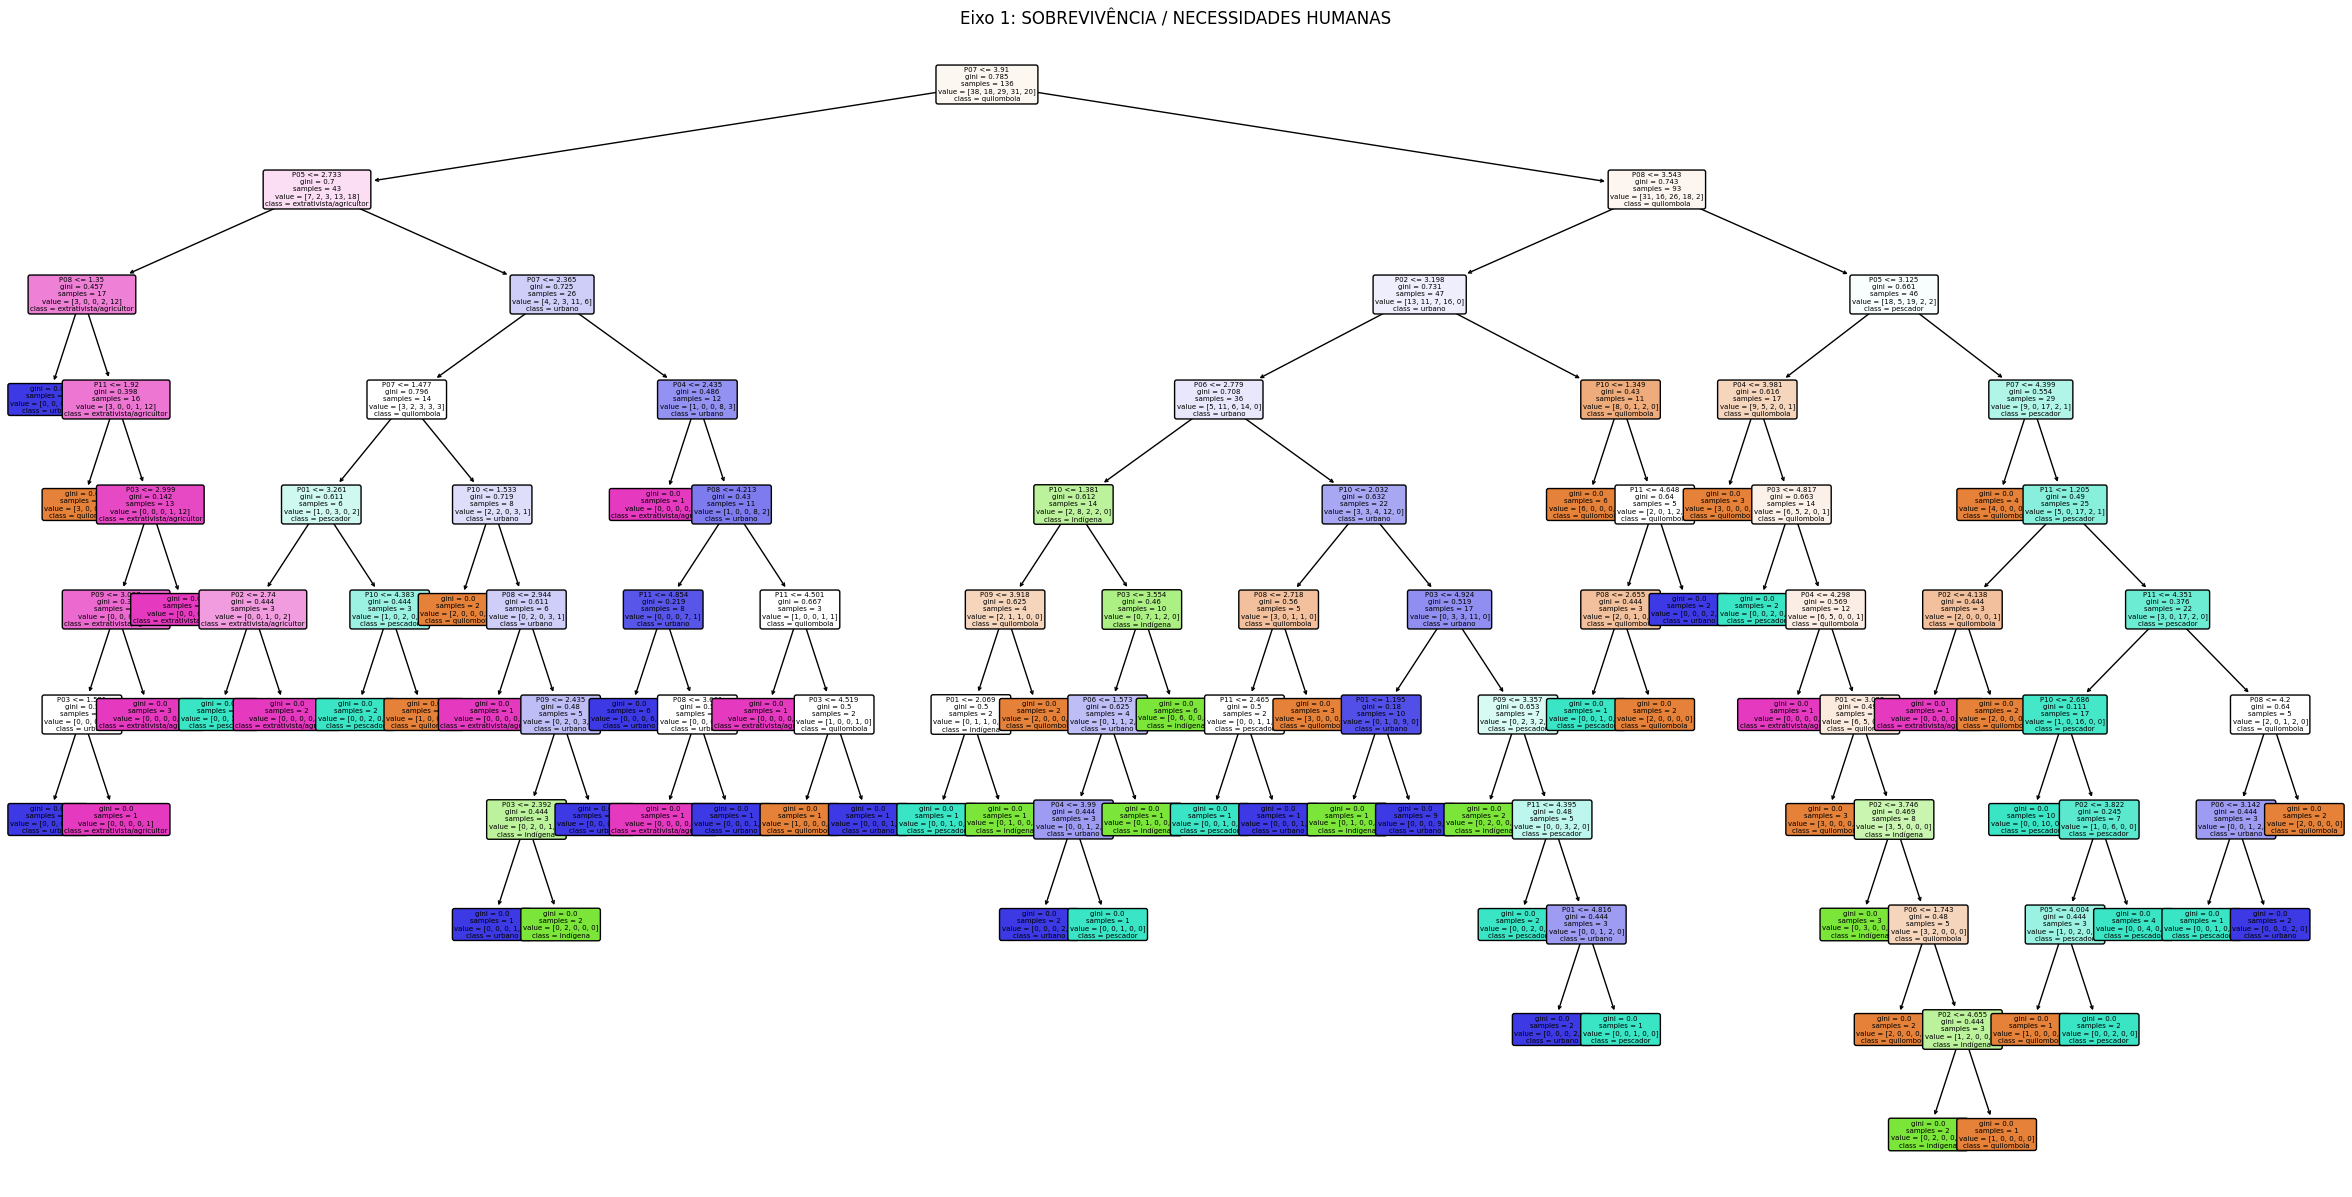

In [ ]:
plt.figure( figsize=(30,15),dpi=100)
plot_tree(best_clf,feature_names=column_names,
                      class_names=target_names,
                      filled=True, rounded=True,fontsize=5.0
                    )
plt.title("Eixo 1: SOBREVIVÊNCIA / NECESSIDADES HUMANAS")
plt.show()